# Introduction to Time Series

## Decomposing Time Series Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Time Series Components


A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components:
- **Systematic**: Components of the time series that have consistency or recurrence and can be described and modeled.
- **Non-Systematic**: Components of the time series that cannot be directly modeled.
  
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise. These components are defined as follows:
- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.

#### Additive Model

$$\widehat{f} = \text{Level} + \text{Trend} + \text{Seasonality} + \text{Noise}$$

#### Multiplicative Model

$$\widehat{f} = \text{Level} \cdot \text{Trend} \cdot \text{Seasonality} \cdot \text{Noise}$$

### Automatic Time Series Decomposition 

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(bike_sharing_df.cnt, model='additive')

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

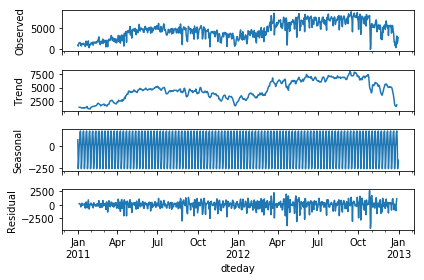

In [4]:
_ = result.plot()

In [5]:
result = seasonal_decompose(bike_sharing_df.cnt, model='multiplicative', freq=1)

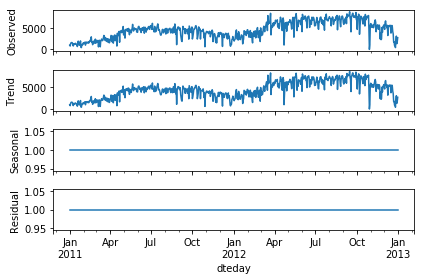

In [6]:
_ = result.plot()

### Identifying a Trend

You can plot time series data to see if a trend is obvious or not. The difficulty is that in practice, identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective. Create line plots of your data and inspect the plots for obvious trends. Add linear and nonlinear trend lines to your plots and see if a trend is obvious.

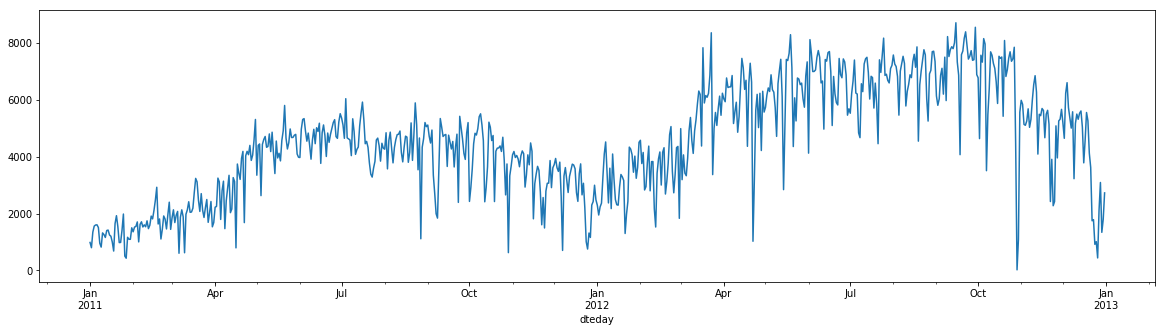

In [7]:
bike_sharing_df.cnt.plot(figsize=(20,5))

### Removing a Trend

A time series with a trend is called non-stationary. An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.

### Detrend by Differencing

In [8]:
bike_sharing_df['cnt_shift_1'] = bike_sharing_df.cnt.shift(1)

In [9]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_shift_1
dteday,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,985.0
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,801.0
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1349.0
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1562.0


In [10]:
bike_sharing_df['cnt_diff_detrend'] = bike_sharing_df.cnt - bike_sharing_df.cnt_shift_1 
# today's count - yesterday's count = difference

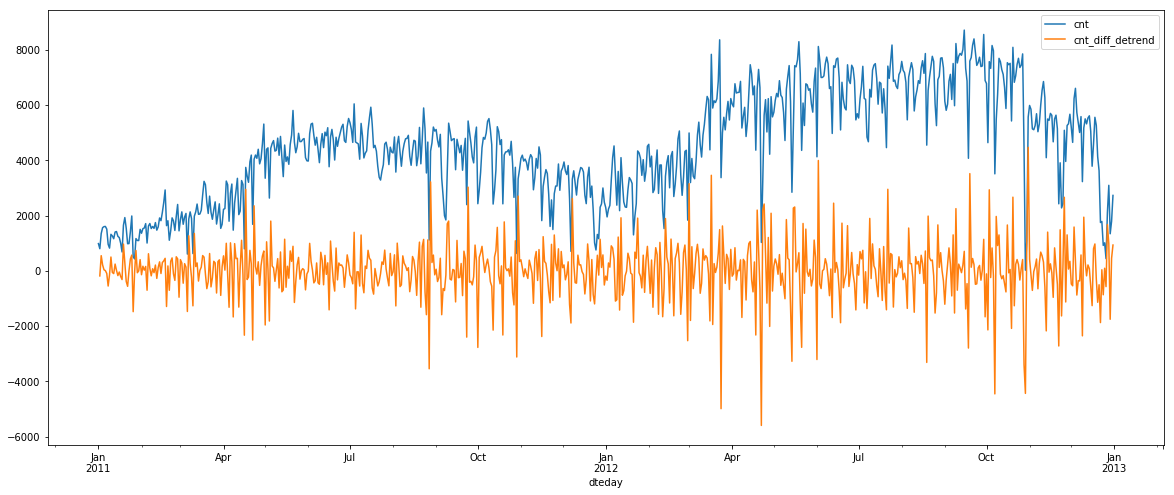

In [11]:
bike_sharing_df[['cnt', 'cnt_diff_detrend']].plot(figsize=(20,8))

## Seasonality

> A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

Page 6, Introductory Time Series with R.

#### Types of Seasonality

There are many types of seasonality; for example:   
- Time of Day
- Daily
- Weekly
- Monthly
- Yearly


### Seasonal Adjustment with Differencing

##### We already did this for daily

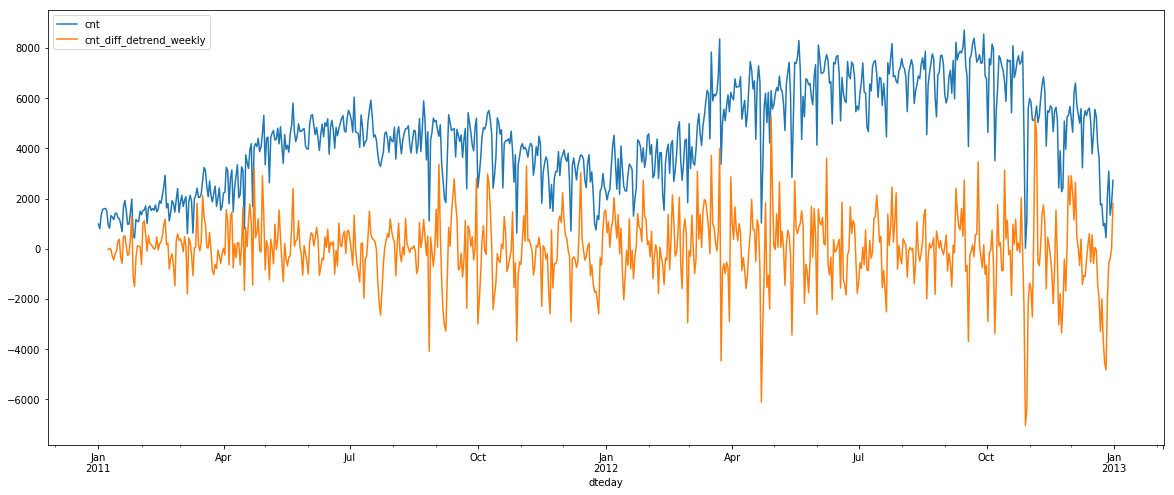

In [12]:
bike_sharing_df['cnt_shift_7'] = bike_sharing_df.cnt.shift(7)
bike_sharing_df['cnt_diff_detrend_weekly'] = bike_sharing_df.cnt - bike_sharing_df.cnt_shift_7
bike_sharing_df[['cnt', 'cnt_diff_detrend_weekly']].plot(figsize=(20,8))

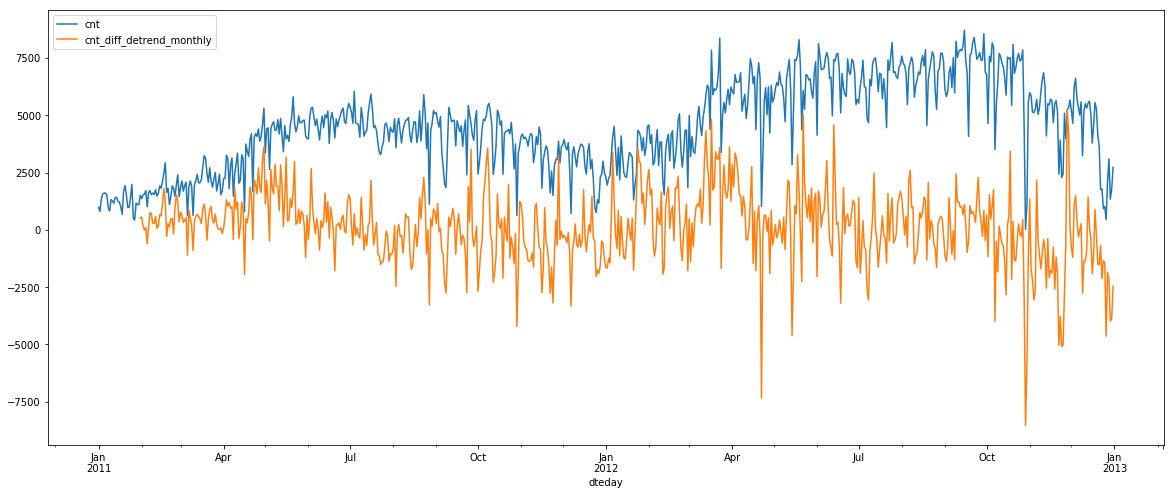

In [13]:
bike_sharing_df['cnt_shift_30'] = bike_sharing_df.cnt.shift(30)
bike_sharing_df['cnt_diff_detrend_monthly'] = bike_sharing_df.cnt - bike_sharing_df.cnt_shift_30
bike_sharing_df[['cnt', 'cnt_diff_detrend_monthly']].plot(figsize=(20,8))

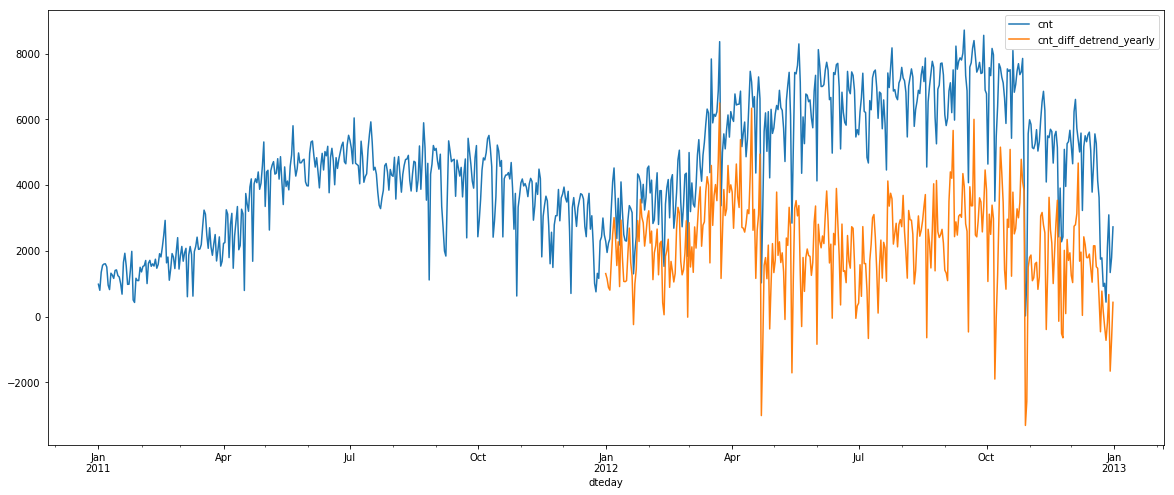

In [14]:
bike_sharing_df['cnt_shift_365'] = bike_sharing_df.cnt.shift(365)
bike_sharing_df['cnt_diff_detrend_yearly'] = bike_sharing_df.cnt - bike_sharing_df.cnt_shift_365
bike_sharing_df[['cnt', 'cnt_diff_detrend_yearly']].plot(figsize=(20,8))